In [2]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import os

PATH = os.getcwd()

print(PATH)

/home/andre/Documents/Git/STD_DCA0107/U2/ModAnalog_python


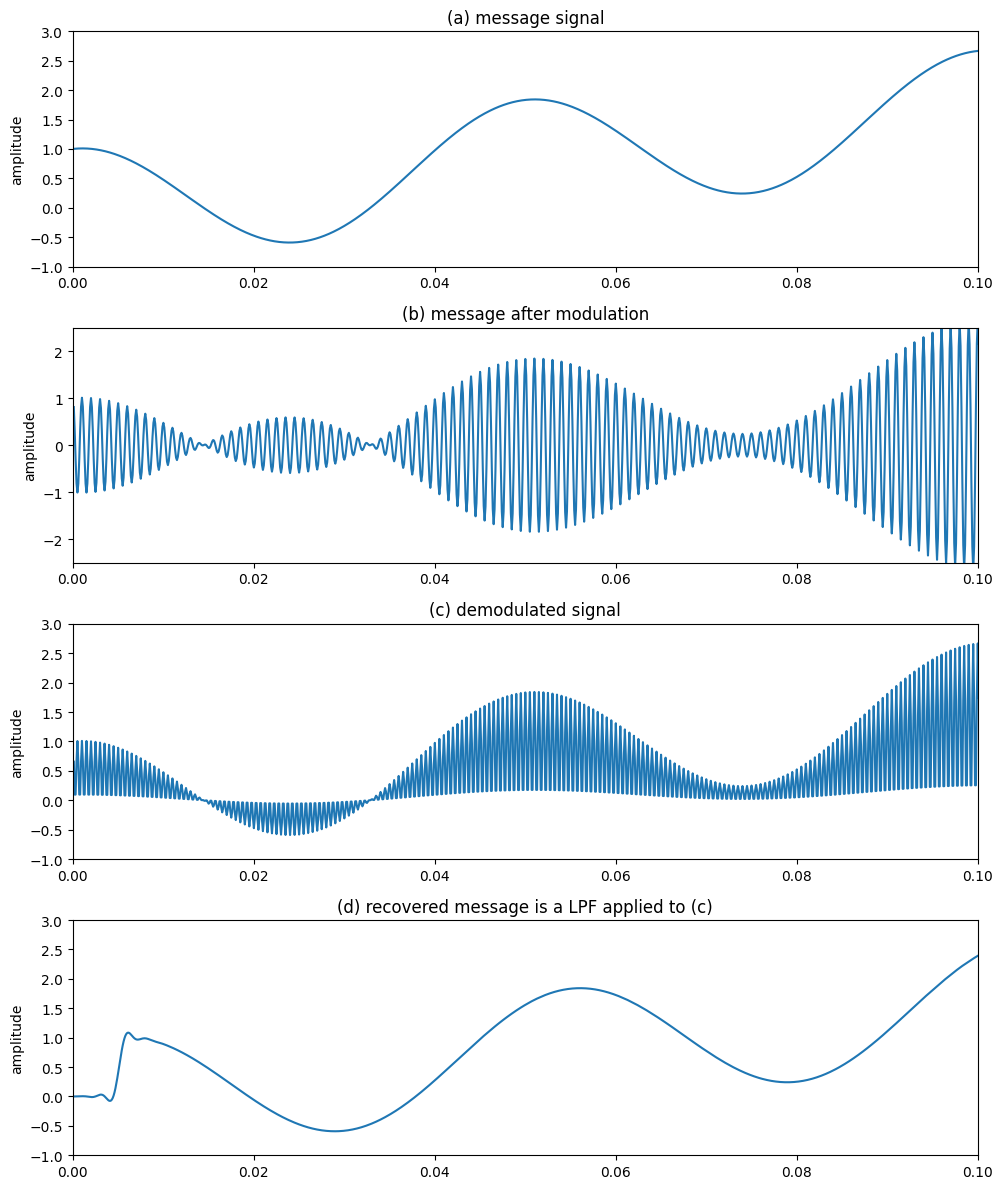

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import firwin, lfilter

# Parâmetros de tempo e amostragem
time = 0.3  # duração do sinal
Ts = 1 / 10000  # intervalo de amostragem
t = np.arange(Ts, time + Ts, Ts)  # vetor de tempo
lent = len(t)  # comprimento do vetor de tempo

# Definição do portador (carrier)
fc = 1000
c = np.cos(2 * np.pi * fc * t)  # portadora na frequência fc

# Definição da mensagem (message)
fm = 20
w = 5 / lent * np.arange(1, lent + 1) + np.cos(2 * np.pi * fm * t)  # mensagem

# Modulação com a portadora
v = c * w  # modulação

# Offset de frequência e fase
gamma = 0
phi = 0
c2 = np.cos(2 * np.pi * (fc + gamma) * t + phi)  # cosseno para demodulação

# Demodulação
x = v * c2  # sinal recebido demodulado

# Design do filtro passa-baixa
fbe = [0, 0.1, 0.2, 1]  # bordas da resposta em frequência normalizada
damps = [1, 1, 0, 0]  # resposta desejada (ganho)
fl = 100  # ordem do filtro
b = firwin(fl + 1, cutoff=0.1, window="hamming")  # resposta ao impulso do filtro
m = 2 * lfilter(b, 1, x)  # aplica o filtro ao sinal demodulado

# Plotagem dos gráficos
plt.figure(figsize=(10, 12))

# Mensagem original
plt.subplot(4, 1, 1)
plt.plot(t, w)
plt.axis([0, 0.1, -1, 3])
plt.ylabel('amplitude')
plt.title('(a) message signal')

# Sinal modulado
plt.subplot(4, 1, 2)
plt.plot(t, v)
plt.axis([0, 0.1, -2.5, 2.5])
plt.ylabel('amplitude')
plt.title('(b) message after modulation')

# Sinal demodulado
plt.subplot(4, 1, 3)
plt.plot(t, x)
plt.axis([0, 0.1, -1, 3])
plt.ylabel('amplitude')
plt.title('(c) demodulated signal')

# Sinal recuperado após aplicação do filtro passa-baixa
plt.subplot(4, 1, 4)
plt.plot(t, m)
plt.axis([0, 0.1, -1, 3])
plt.ylabel('amplitude')
plt.title('(d) recovered message is a LPF applied to (c)')

plt.tight_layout()
plt.show()
